### 1 Review the online programming

* Dynamic Programming

In [8]:
from collections import defaultdict

In [9]:
origin_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [33]:
price = defaultdict(int)
for i, p in enumerate(origin_price):
    price[i+1] = p

In [34]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

* Get the max splitting by enumerate

In [19]:
def example(f, arg):
    return f(arg)

def add_ten(num):
    return num + 10

def mul_ten(num):
    return num * 10

In [20]:
operations = [add_ten, mul_ten]

for f in operations:
    print(example(f, 100))

110
1000


In [21]:
# functools 库中提供了 partial 方法实现上述功能
from functools import partial

In [22]:
def add(*args, **kwargs):
    print('------------------ this positional arguments ------------------')
    for arg in args:
        print(arg)
        
    print('------------------ this keyword arguments ------------------')
    for k, v in kwargs.items():
        print('{key} = {value}'.format(key=k, value=v))

In [23]:
add(1, 2, 3, k1=20, k2=30)

------------------ this positional arguments ------------------
1
2
3
------------------ this keyword arguments ------------------
k1 = 20
k2 = 30


In [24]:
super_add = partial(add, 4, 5, k1=100, k2=300)

In [26]:
super_add(1, 2, 3, k2=400, k4=1000)

------------------ this positional arguments ------------------
4
5
1
2
3
------------------ this keyword arguments ------------------
k1 = 100
k2 = 400
k4 = 1000


* 装饰器

In [27]:
call_times = defaultdict(int)

def get_call_times(f):
    result = f()
    print('function: {} called once!'.format(f.__name__))
    call_times[f.__name__] += 1
    return result

In [28]:
def some_function_1(): print('I am function 1')

In [31]:
get_call_times(some_function_1)

I am function 1
function: some_function_1 called once!


In [32]:
call_times

defaultdict(int, {'some_function_1': 2})

In [238]:
call_times_with_args = defaultdict(int)

def r(n):
    call_times_with_args[(r.__name__, n)] += 1
    return max([price[n]] + [r(i) + r(n-i) for i in range(1, n)])

In [239]:
r(15)

45

In [123]:
del call_times_with_args

In [124]:
from functools import wraps

In [311]:
def get_call_times(f):
    """@ param f is a function"""
    get_call_times.call_times_with_args = defaultdict(int)
    @wraps(f)
    def wrap(n):
        """this is wraps"""
        get_call_times.call_times_with_args[(f.__name__, n)] += 1
        result = f(n)
        return result
    return wrap

In [312]:
def add_ten(n): 
    """this add ten docs"""
    return n+10

In [313]:
add_ten(10)

20

In [314]:
add_ten.__doc__

'this add ten docs'

In [315]:
add_ten = get_call_times(add_ten)

In [316]:
add_ten.__doc__

'this add ten docs'

In [317]:
add_ten(100)
get_call_times.call_times_with_args

defaultdict(int, {('add_ten', 100): 1})

In [279]:
@get_call_times
def add_twenty(n):
    """this is add twenty doc"""
    return n + 20

In [280]:
# add_twenty = get_call_times(add_twenty)
add_twenty(100)
get_call_times.call_times_with_args

defaultdict(int, {('add_twenty', 100): 1})

In [229]:
add_twenty.__doc__

'this is add twenty doc'

In [230]:
add_ten.__name__

'add_ten'

In [231]:
add_ten.__doc__

'this add ten docs'

In [232]:
@get_call_times
def r(n):
    return max([price[n]] + [r(i) + r(n-i) for i in range(1, n)])

In [233]:
r(12)

36

In [234]:
call_times_with_args

defaultdict(int,
            {('add_ten', 100): 1,
             ('add_twenty', 100): 1,
             ('r', 12): 1,
             ('r', 1): 118098,
             ('r', 11): 2,
             ('r', 10): 6,
             ('r', 9): 18,
             ('r', 8): 54,
             ('r', 7): 162,
             ('r', 6): 486,
             ('r', 5): 1458,
             ('r', 4): 4374,
             ('r', 3): 13122,
             ('r', 2): 39366})

In [259]:
def memo(f):
    memo.cache = defaultdict(int)
    @wraps(f)
    def wrap(n):
        if n in memo.cache:
            return memo.cache[n]
        else:
            res = f(n)
            memo.cache[n] = res
            return res
    return wrap

In [318]:
solutions = {}

@get_call_times
@memo
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)])
    solutions[n] = (max_split, n-max_split)
    return max_price

In [319]:
r(34)

106

In [320]:
get_call_times.call_times_with_args

defaultdict(int,
            {('r', 34): 1,
             ('r', 1): 66,
             ('r', 33): 2,
             ('r', 32): 4,
             ('r', 31): 6,
             ('r', 30): 8,
             ('r', 29): 10,
             ('r', 28): 12,
             ('r', 27): 14,
             ('r', 26): 16,
             ('r', 25): 18,
             ('r', 24): 20,
             ('r', 23): 22,
             ('r', 22): 24,
             ('r', 21): 26,
             ('r', 20): 28,
             ('r', 19): 30,
             ('r', 18): 32,
             ('r', 17): 34,
             ('r', 16): 36,
             ('r', 15): 38,
             ('r', 14): 40,
             ('r', 13): 42,
             ('r', 12): 44,
             ('r', 11): 46,
             ('r', 10): 48,
             ('r', 9): 50,
             ('r', 8): 52,
             ('r', 7): 54,
             ('r', 6): 56,
             ('r', 5): 58,
             ('r', 4): 60,
             ('r', 3): 62,
             ('r', 2): 64})

In [301]:
memo.cache

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 10,
             5: 13,
             6: 17,
             7: 18,
             8: 22,
             9: 25,
             10: 30,
             11: 35,
             12: 36,
             13: 40,
             14: 43,
             15: 45,
             16: 48,
             17: 52,
             18: 53,
             19: 57,
             20: 60,
             21: 65,
             22: 70,
             23: 71,
             24: 75,
             25: 78,
             26: 80,
             27: 83,
             28: 87,
             29: 88,
             30: 92,
             31: 95,
             32: 100,
             33: 105,
             34: 106,
             35: 110,
             36: 113,
             37: 115,
             38: 118,
             39: 122,
             40: 123,
             41: 127,
             42: 130,
             43: 135,
             44: 140,
             45: 141,
             46: 145,
             4

In [302]:
solutions

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (3, 2),
 6: (0, 6),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (0, 10),
 11: (0, 11),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3),
 21: (11, 10),
 22: (11, 11),
 23: (22, 1),
 24: (22, 2),
 25: (22, 3),
 26: (24, 2),
 27: (25, 2),
 28: (22, 6),
 29: (28, 1),
 30: (28, 2),
 31: (28, 3),
 32: (22, 10),
 33: (22, 11),
 34: (33, 1),
 35: (33, 2),
 36: (33, 3),
 37: (35, 2),
 38: (36, 2),
 39: (33, 6),
 40: (39, 1),
 41: (39, 2),
 42: (39, 3),
 43: (33, 10),
 44: (33, 11),
 45: (44, 1),
 46: (44, 2),
 47: (44, 3),
 48: (46, 2),
 49: (47, 2),
 50: (44, 6),
 51: (50, 1),
 52: (50, 2),
 53: (50, 3),
 54: (44, 10),
 55: (44, 11),
 56: (55, 1),
 57: (55, 2),
 58: (55, 3),
 59: (57, 2),
 60: (58, 2),
 61: (55, 6),
 62: (61, 1),
 63: (61, 2),
 64: (61, 3),
 65: (55, 10),
 66: (55, 11),
 67: (66, 1),
 68: (66, 2),
 69: (66, 3),
 70: (68, 2),
 71: (69, 2),
 72: (66, 6),


In [303]:
def parse_solution(n):
    left_split, right_split = solutions[n]
    if left_split == 0: return [right_split]
    return parse_solution(left_split) + parse_solution(right_split)

In [305]:
parse_solution(234)

[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 3]

### 2 change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [4]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = load_boston()
X, y = data['data'], data['target']
X.shape, y.shape

((506, 13), (506,))

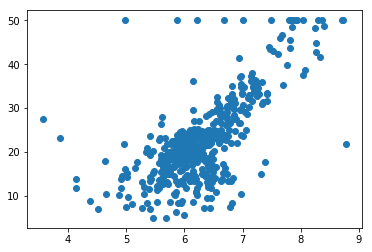

In [3]:
x = X[:, 5]
plt.scatter(x, y)

* mean_absolute_error
$$loss=\frac{1}{n}\sum \left| y_i-\hat{y_i}\right|$$

In [4]:
def mean_absolute_error(y, y_hat):
    return np.abs(y - y_hat).sum() / y.size

$$
\frac{\partial loss}{\partial k}=
\begin{cases}
\frac{1}{n}\sum-x_i, & y_i > \hat{y_i} \\
\frac{1}{n}\sum x_i, & y_i < \hat{y_i}
\end{cases}\\
$$

$$ \frac{\partial loss}{\partial k}=\frac{1}{n}\sum sign(\hat{y_i}-y_i)*x_i \\ $$

$$ \frac{\partial loss}{\partial b}=\frac{1}{n}\sum sign(\hat{y_i}-y_i) $$

In [5]:
def get_y_hat(k, b, x):
    return k * x + b

In [6]:
def fit(x, y, it=1000, lr=0.001):
    current_k = current_b = np.random.random()
    for i in range(it):
        y_hat = get_y_hat(current_k, current_b, x)
        loss = mean_absolute_error(y, y_hat)
        if (i+1) % 1000 == 0:
            print('iter {it} times, current k is {k} current b is {b} loss is {l}'.format(it=i, k=current_k, b=current_b, l=loss))
        y_diff_sign = np.sign(y_hat - y)
        current_k -= lr * (y_diff_sign * x).sum() / y.size
        current_b -= lr * y_diff_sign.sum() / y.size
    return current_k, current_b

In [7]:
best_k, best_b = fit(x, y, 5000, 0.1)

iter 999 times, current k is 4.013949862999181 current b is -3.1127760263288895 loss is 5.281186072236348
iter 1999 times, current k is 4.655907175252148 current b is -7.047163378107639 loss is 5.12220856338476
iter 2999 times, current k is 5.240704013196792 current b is -10.600918318818959 loss is 4.992404937489689
iter 3999 times, current k is 5.777035238493323 current b is -13.860206856368448 loss is 4.883188366928867
iter 4999 times, current k is 6.253671206872769 current b is -16.814752310914034 loss is 4.793609294034879


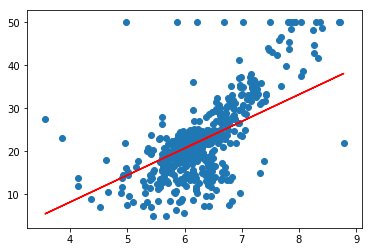

In [8]:
y_hat = get_y_hat(best_k, best_b, x)
plt.plot(x, y_hat, color='r');
plt.scatter(x, y);

iter 999 times, current k is 3.344676575498842 current b is 0.9917366249059861 loss is 5.464792707864854
iter 999 times, current k is 3.9464872532222293 current b is -2.711858774445742 loss is 5.297838555465131
iter 999 times, current k is 4.692187931537848 current b is -7.079214044746693 loss is 5.126140273818201
iter 999 times, current k is 6.208401039342874 current b is -9.165422083186716 loss is 8.656452217845484
iter 999 times, current k is 3.3422820727061207 current b is 1.0056858177654486 loss is 5.465439989504024
iter 1999 times, current k is 3.381686519346506 current b is 0.7804881893069392 loss is 5.454986461684694
iter 999 times, current k is 3.986549900250255 current b is -2.9438625701054746 loss is 5.288189830930589
iter 1999 times, current k is 4.56627511764164 current b is -6.505799328998749 loss is 5.143454898509107
iter 999 times, current k is 4.744870249994895 current b is -7.452606825103884 loss is 5.109296483685241
iter 1999 times, current k is 5.845218076081754 cur

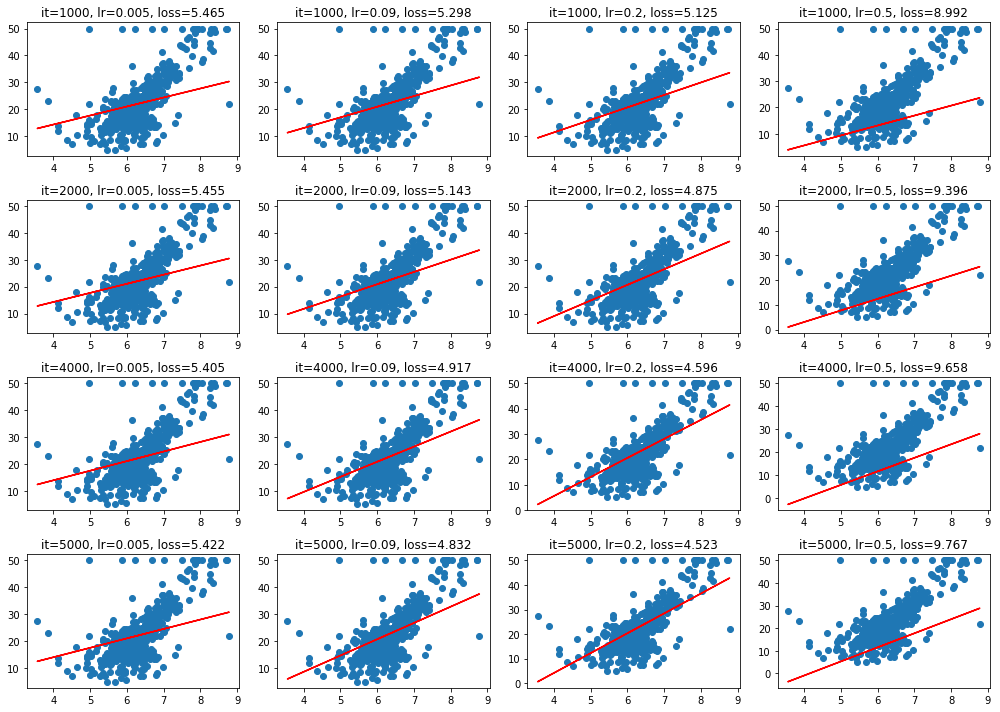

In [9]:
params = [(it, lr) for it in [1000, 2000, 4000, 5000] for lr in [0.005, 0.09, 0.2, 0.5]]
fig, axs = plt.subplots(4, 4, figsize=(14, 10))
for ax, (it, lr) in zip(axs.flatten(), params):
    k, b = fit(x, y, it=it, lr=lr)
    y_hat = get_y_hat(k, b, x)
    loss = mean_absolute_error(y, y_hat)
    title = "it={it}, lr={lr}, loss={loss:.3f}".format(it=it, lr=lr, loss=loss)
    ax.set_title(title)
    ax.scatter(x, y);
    ax.plot(x, y_hat, color='red');
fig.tight_layout()

### 3 Part 3: Finish the Solution Parse Part of Edit-Distance

In [1]:
from typing import Tuple, List
from functools import lru_cache

In [2]:
def edit_distance(str1: str, str2: str) -> int:
    """Self-thinking"""
    distance = float('inf')
    @lru_cache(maxsize=2**10)
    def helper(str1, str2, dist):
        nonlocal distance
        if not str1 and not str2:
            distance = min(dist, distance)
            return
        if not str1:
            distance = min(dist+len(str2), distance)
            return 
        if not str2:
            distance = min(dist+len(str1), distance)
            return
        if str1[0] == str2[0]:
            helper(str1[1:], str2[1:], dist)
        else:
            helper(str1, str2[1:], dist+1) # 删除 str2 中的第一个字母
            helper(str1[1:], str2[1:], dist+1) # 替换 str2 的第一个字母为 str1 的第一个字母
            helper(str1[1:], str2, dist+1) # 将 str1 的第一个字母插入到 str2 的第一个位置
    helper(str1, str2, 0)
    return distance

In [4]:
str1 = 'ago'
str2 = 'got'
edit_distance(str1, str2)

2

In [5]:
# 记录最佳转换路径
def edit_distance(str1: str, str2: str) -> Tuple[int, str]:
    """Self-thinking"""
    distance = float('inf')
    best_route = ''
    def helper(str1: str, str2: str, dist: int, tmp: List[str]) -> None:
        nonlocal distance, best_route
        if not str1 and not str2:
            if dist < distance:
                distance = dist
                best_route = '->'.join(tmp)
            return
        if not str1:
            if dist + len(str2) < distance:
                distance = dist + len(str2)
                best_route = '->'.join(tmp+[str2 + ' ' + str2])
            return 
        if not str2:
            if dist + len(str1) < distance:
                distance = dist + len(str1)
                best_route = '->'.join(tmp+[str1 + ' ' + str1])
            return
        if str1[0] == str2[0]:
            helper(str1[1:], str2[1:], dist, tmp+[str1+' '+str2])
        else:
            helper(str1, str2[1:], dist+1, tmp+[str1+' '+str2]) # 删除 str2 中的第一个字母
            helper(str1[1:], str2[1:], dist+1, tmp+[str1+' '+str2]) # 替换 str2 的第一个字母为 str1 的第一个字母
            helper(str1[1:], str2, dist+1, tmp+[str1+' '+str2]) # 将 str1 的第一个字母插入到 str2 的第一个位置
    helper(str1, str2, 0, [])
    return distance, best_route

In [6]:
str1 = 'ago'
str2 = 'got'
edit_distance(str1, str2)

(2, 'ago got->go got->o ot->t t')

* 老师的做法

In [18]:
def edit_distance(string1: str, string2:str) -> int:
    solutions = {}
    @lru_cache(maxsize=2**10)
    def helper(string1: str, string2:str) -> int:
        if len(string1) == 0: 
            solutions[(string1, string2)] = 'ADD ' + string2
            return len(string2)
        if len(string2) == 0: 
            solutions[(string1, string2)] = 'DEL ' + string1
            return len(string1)

        tail_s1 = string1[-1]
        tail_s2 = string2[-1]

        candidates = [
            (helper(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)), # 删除 s1 的尾字母
            (helper(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)), # 添加 s2 的尾字母到 s1 的尾部
        ]

        if tail_s1 == tail_s2:
            both_forward = (helper(string1[:-1], string2[:-1]), '')
        else:
            both_forward = (helper(string1[:-1], string2[:-1])+1, 'SUB {} => {}'.format(tail_s1, tail_s2))

        candidates.append(both_forward)

        min_distance, operation = min(candidates)

        solutions[(string1, string2)] = operation

        return min_distance
    return helper(string1, string2), solutions

In [19]:
string1 = 'ago'
string2 = 'got'
distance, solutions = edit_distance(string1, string2)

In [20]:
solutions

{('', 'got'): 'ADD got',
 ('', 'go'): 'ADD go',
 ('', 'g'): 'ADD g',
 ('a', ''): 'DEL a',
 ('', ''): 'ADD ',
 ('a', 'g'): 'SUB a => g',
 ('a', 'go'): 'ADD o',
 ('a', 'got'): 'ADD t',
 ('ag', ''): 'DEL ag',
 ('ag', 'g'): '',
 ('ag', 'go'): 'ADD o',
 ('ag', 'got'): 'ADD t',
 ('ago', ''): 'DEL ago',
 ('ago', 'g'): 'DEL o',
 ('ago', 'go'): '',
 ('ago', 'got'): 'ADD t'}

In [21]:
def parse_solutions(solutions: dict, string1: str, string2: str) -> str:
    route = []
    def helper(solutions: dict, string1: str, string2: str) -> None:
        if not string1 and not string2: return
        operation = solutions[(string1, string2)]
        route.append('{k}: {v}'.format(k=(string1, string2), v=operation))
        if operation.startswith('SUB') or operation == '':
            helper(solutions, string1[:-1], string2[:-1])
        elif operation.startswith('ADD'):
            helper(solutions, string1, string2[:-1])
        elif operation.startswith('DEL'):
            helper(solutions, string1[:-1], string2)
    helper(solutions, string1, string2)
    return '->'.join(route)

In [22]:
parse_solutions(solutions, string1, string2)

"('ago', 'got'): ADD t->('ago', 'go'): ->('ag', 'g'): ->('a', ''): DEL a"

In [461]:
string1 = 'beijing'
string2 = 'biejin'
dist, solutions = edit_distance(string1, string2)
dist, solutions

(3,
 {('b', 'b'): '',
  ('b', 'bi'): 'ADD i',
  ('b', 'bie'): 'ADD e',
  ('b', 'biej'): 'ADD j',
  ('b', 'bieji'): 'ADD i',
  ('b', 'biejin'): 'ADD n',
  ('be', 'b'): 'DEL e',
  ('be', 'bi'): 'SUB e => i',
  ('be', 'bie'): '',
  ('be', 'biej'): 'ADD j',
  ('be', 'bieji'): 'ADD i',
  ('be', 'biejin'): 'ADD n',
  ('bei', 'b'): 'DEL i',
  ('bei', 'bi'): '',
  ('bei', 'bie'): 'ADD e',
  ('bei', 'biej'): 'SUB i => j',
  ('bei', 'bieji'): '',
  ('bei', 'biejin'): 'ADD n',
  ('beij', 'b'): 'DEL j',
  ('beij', 'bi'): 'DEL j',
  ('beij', 'bie'): 'SUB j => e',
  ('beij', 'biej'): '',
  ('beij', 'bieji'): 'ADD i',
  ('beij', 'biejin'): 'SUB j => n',
  ('beiji', 'b'): 'DEL i',
  ('beiji', 'bi'): '',
  ('beiji', 'bie'): 'DEL i',
  ('beiji', 'biej'): 'DEL i',
  ('beiji', 'bieji'): '',
  ('beiji', 'biejin'): 'ADD n',
  ('beijin', 'b'): 'DEL n',
  ('beijin', 'bi'): 'DEL n',
  ('beijin', 'bie'): 'DEL n',
  ('beijin', 'biej'): 'DEL n',
  ('beijin', 'bieji'): 'DEL n',
  ('beijin', 'biejin'): '',
  ('beij

In [462]:
parse_solutions(solutions, string1, string2)

"('beijing', 'biejin'): DEL g->('beijin', 'biejin'): ->('beiji', 'bieji'): ->('beij', 'biej'): ->('bei', 'bie'): ADD e->('bei', 'bi'): ->('be', 'b'): DEL e->('b', 'b'): "

### 5.1 review machine learning
1.Why do we use Derivative / Gradient to fit a target function? <br>
Ans: 因为梯度指明了目标函数的增长方向，这也就指明了目标函数朝哪个方向下降最快，那我们的参数通过梯度更新，每一步都在减小目标函数的值，这正是我们希望看到的 <br>  
2.In the words 'Gradient Descent', what's the Gradient and what's the Descent? <br>
Ans: “梯度”是指目标函数的导数即目标函数增长最快的方向，“下降”指的是参数通过负梯度更新，达到以目标函数减小最快的方向更新参数的目的<br>  
3.Using the simple words to describe: What's the machine learning? <br>
Ans: 输入数据对和学习方法输出数据对之间的映射关系

### 5.2 Answer following questions
1.Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problem? <br>
Ans: 动态规划一般用于解决多阶段最优化决策问题，它充分利用了这类问题的几个特点，最优子结构、重复子问题和无后效性；如果不利用这些特征进行暴力搜索，算法复杂度会特别高，效率低下；利用好这几点的动态规划大大减少了计算重复。前面所讲的搜索问题每一步的选择会对后面的选择产生影响，并且如果要在全局上拿到最优解则没有所谓的最优子结构，是在暴力搜索的基础上进行了一定的剪枝 <br>  
2.Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs? <br>
Ans: 同一个动态规划问题不同的输入和输出之间不具有一个通用的映射关系 <br>  
3.Can you catch up at least 3 problems which could solved by Dynamic Programming? <br>
Ans: 最短路径问题、分词问题、编辑距离 <br>  
4.Can you catch up at least 3 problems which could solved by Edit Distance? <br>
Ans: 语音识别、拼写纠错、评估机器翻译 <br>  
5.Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.<br>
Ans: 最优子结构：问题的最优解可由当前阶段的最优解推得；无后效性：在推导后面阶段的状态的时候，只关心前面阶段的状态值，并不关心这个状态怎么来的；某阶段状态一旦确定则不受之后决策阶段的影响；重复子问题：不同的搜索序列中间会存在重复的状态 <br>  
6.What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet) <br>
Ans: 没有统一标准的模型，不同的问题不同的解法，只是一类思想；当数据维度较高时，空间复杂度可能会很高

### (Optional) Finish the k-person-salesman problem:

In [1]:
from copy import deepcopy

In [5]:
n = 20
longitudes = [np.random.randint(-100, 100) for _ in range(n)]
latitudes = [np.random.randint(-100, 100) for _ in range(n)] 
coordinates = list(zip(longitudes, latitudes))
len(coordinates), coordinates[0]

(20, (-88, -7))

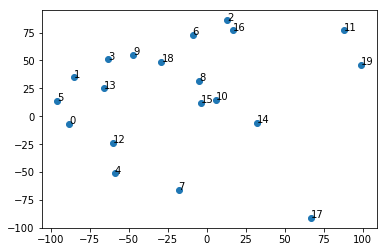

In [6]:
fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes)
for i in range(n):
    ax.annotate(i, (longitudes[i], latitudes[i]))

* 以下参考：https://www.zhihu.com/question/275293660

In [9]:
def get_distance(x: tuple, y: tuple) -> float:
    return np.sqrt((x[0]-y[0])**2 + (x[-1]-y[-1])**2)

def tsp(coordinates: List[Tuple[int, int]], start: int=0) -> np.float64:
    length = len(coordinates)
    all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}
    opt = [[[i], i, all_distances[frozenset([start, i])]] for i in range(length) if i != start]
    while len(opt[0][0]) < length-1:
        opt_n = []
        for j in range(length):
            if j == start: continue
            tmp = [None, j, float('inf')]
            for visited, cur, dist in opt:
                if j in visited: continue
                tmp_dist = all_distances[frozenset([cur, j])]
                if tmp_dist + dist < tmp[-1]:
                    tmp[0] = visited + [j]
                    tmp[-1] = tmp_dist + dist
            if tmp[0]: opt_n.append(deepcopy(tmp))
        opt = opt_n
    min_distance = float('inf')
    route = None
    for visited, cur, dist in opt:
        tmp_dist = all_distances[frozenset([cur, start])] + dist
        if tmp_dist < min_distance:
            min_distance = tmp_dist
            route = visited
    return min_distance, route

In [10]:
tsp(coordinates)

(914.5460185314396,
 [5, 1, 13, 3, 9, 18, 8, 6, 2, 16, 11, 19, 10, 15, 14, 12, 7, 17, 4])

* 以下参考：https://www.cnblogs.com/youmuchen/p/6879579.html

In [12]:
def tsp(coordinates: List[Tuple[int, int]]) -> np.float64:
    tsp.solutions = {}
    length = len(coordinates)
    dp = [[float('inf')] * 2**(length-1) for _ in range(length)]
    # 计算所有城市两两之间的距离
    all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}
    for i in range(length):
        if i == 0: continue
        dp[i][0] = all_distances[frozenset([i, 0])]
    for j in range(1, len(dp[0])):
        for i in range(length):
            if i != 0 and (j >> (i - 1)) & 1 == 1: # 出发的城市在要经过的城市里，不合常理
                continue
            tsp.solutions[(i, j)] = (None, None)
            for k in range(1, length):
                if (j >> (k - 1)) & 1 == 0: continue # 不经过该城市则查看下一个城市
                tmp_dist = all_distances[frozenset([i, k])] + dp[k][j ^ (1 << (k - 1))]
                if dp[i][j] > tmp_dist:
                    dp[i][j] = tmp_dist
                    tsp.solutions[(i, j)] = (k, j ^ (1 << (k - 1)))
    return dp[0][-1]

In [52]:
tsp(coordinates)

752.6077133910767

In [53]:
def parse_solutions(length: int, solutions: dict) -> str:
    route = ['0']
    def helper(row: int, col: int) -> None:
        i, j = solutions[(row, col)]
        route.append(str(i))
        if j == 0: return
        helper(i, j)
    helper(0, 2**(length-1)-1)
    route.append('0')
    return route

def pretty_print(route: List[str]) -> str:
    print('->'.join(route))

In [54]:
route = parse_solutions(len(coordinates), tsp.solutions)

In [55]:
pretty_print(route)

0->5->1->13->3->9->18->6->2->16->11->19->8->15->10->14->17->7->4->12->0


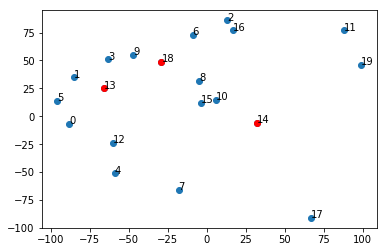

In [30]:
fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes)
k1, k2, k3 = coordinates[18], coordinates[13], coordinates[14]
ax.scatter(k1[0], k1[1], color='r')
ax.scatter(k2[0], k2[1], color='r')
ax.scatter(k3[0], k3[1], color='r')
for i in range(n):
    ax.annotate(i, (longitudes[i], latitudes[i]))

In [43]:
def mul_start_tsp(coordinates: List[Tuple[int, int]], k1: int, k2: int, k3: int):
    # p1, p2, p3 = coordinates[k1], coordinates[k2], coordinates[k3]
    length = len(coordinates)
    all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}
    c = [[k1], [k2], [k3]]
    # clustering
    for i in range(length):
        if i in [k1, k2, k3]: continue
        dist = np.array([all_distances[frozenset([i, k1])], all_distances[frozenset([i, k2])], all_distances[frozenset([i, k3])]])
        c[dist.argmin()].append(i)
    solutions = []
    for cluster in c:
        distance = tsp([coordinates[i] for i in cluster])
        solutions.append((distance, tsp.solutions))
    return c, solutions

In [44]:
c, solutions = mul_start_tsp(coordinates, 18, 13, 14)

In [45]:
c

[[18, 2, 6, 8, 9, 16], [13, 0, 1, 3, 4, 5, 12], [14, 7, 10, 11, 15, 17, 19]]

In [64]:
def parse_mul_solutions(c: List[List[int]], solutions: List[dict]):
    routes = []
    for i, (_, s) in enumerate(solutions):
        idx_map = {str(j): str(val) for j, val in enumerate(c[i])} # 将聚类后的索引映射回原索引
        tmp = parse_solutions(len(c[i]), s)
        routes.append([idx_map[k] for k in tmp])
    return routes

In [61]:
routes = parse_mul_solutions(c, solutions)

In [63]:
for r in routes:
    pretty_print(r)

18->8->16->2->6->9->18
13->12->4->0->5->1->3->13
14->10->15->7->17->19->11->14


* 通过以上聚类得到的结果并非最优解，所有点到起点的距离最近不能保证将这所有点连接起来的长度最小